In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [3]:
ret = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400')

In [4]:
ret

<Response [200]>

In [60]:
df = pd.DataFrame(ret.json())
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000,225.00,225.000000,244.00,46.276313,0.193117,239.627778
1,1424390400,245.000,240.25,240.250118,240.25,55.894897,0.230429,242.568479
2,1424476800,245.000,245.00,245.000000,245.00,14.722239,0.060091,245.000000
3,1424563200,249.000,235.00,245.000000,235.00,129.121248,0.539055,239.532608
4,1424649600,235.001,235.00,235.000002,235.00,96.567562,0.410926,235.000062


In [ ]:
df.info()

In [18]:
scaler = MinMaxScaler()
price = scaler.fit_transform(df)[:, 4]

In [20]:
price = list(price)

In [ ]:
price

In [ ]:
# [0.0009693439164567483,
#  0.0009136606841575663,
#  0.0009841927784031966,
#  0.0008357041589387116,
#  0.0008357041589387116,
#  0.0009062362531843419,
#  0.0008765385292914449,
#  0.0008876751757512812,


#  x = [0.0009693439164567483,
#  0.0009136606841575663,
#  0.0009841927784031966,
#  0.0008357041589387116,
#  0.0008357041589387116]
#  y = 0.0009062362531843419

# X = [
#      [0.0009693439164567483,
#  0.0009136606841575663,
#  0.0009841927784031966,
#  0.0008357041589387116,
#  0.0008357041589387116],

#  [0.0009136606841575663,
#  0.0009841927784031966,
#  0.0008357041589387116,
#  0.0008357041589387116,
#  0.0009062362531843419],

#  [0.0009841927784031966,
#  0.0008357041589387116,
#  0.0008357041589387116,
#  0.0009062362531843419,
#  0.0008765385292914449],
# ...
# ]
 
# Y = [
#      0.0009062362531843419,
#      0.0008765385292914449,
#      0.0008876751757512812,
#      ...
# ]

In [22]:
window_size=10
X = []
Y = []

for i in range(len(price)- window_size):
  X.append([price[i+j] for j in range(window_size)])
  Y.append(price[window_size + i])

In [24]:
X = np.array(X)
Y = np.array(Y)

In [25]:
X.shape

(2579, 10)

In [26]:
Y.shape

(2579,)

In [27]:
train_test_split = 2000

x_train = X[:2000]
y_train = Y[:2000]

x_test = X[2000:]
y_test = Y[2000:]

In [28]:
x_train.shape

(2000, 10)

In [30]:
x_test.shape

(579, 10)

In [32]:
# 3차원입력 : (n_sample, time_steps, n_features)

x_train = np.reshape(x_train, (2000, 10, 1))
x_test = np.reshape(x_test, (579, 10, 1))

In [33]:
x_train.shape

(2000, 10, 1)

In [36]:
model = Sequential()
model.add(LSTM(100, input_shape=(10,1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data = (x_test, y_test))

In [39]:
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

In [ ]:
x_train_pred

In [44]:
y_train.shape

(2000,)

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(price[window_size:])
plt.plot(x_train_pred)
plt.plot(np.arange(2000, 2000+579), x_test_pred)

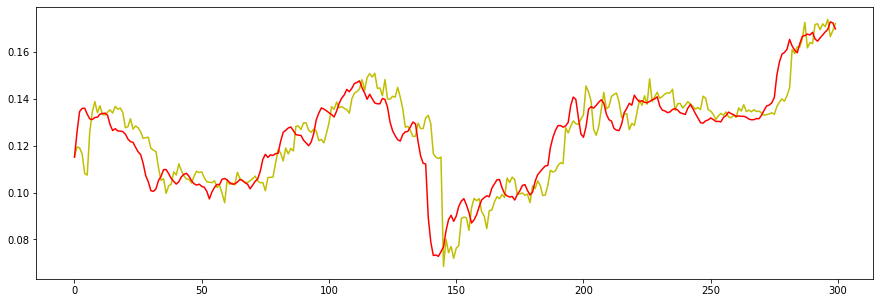

In [58]:
plt.figure(figsize=(15,5))

plt.plot(price[window_size:2003][-300:], color='y')
plt.plot(x_train_pred[-300:], color='r')

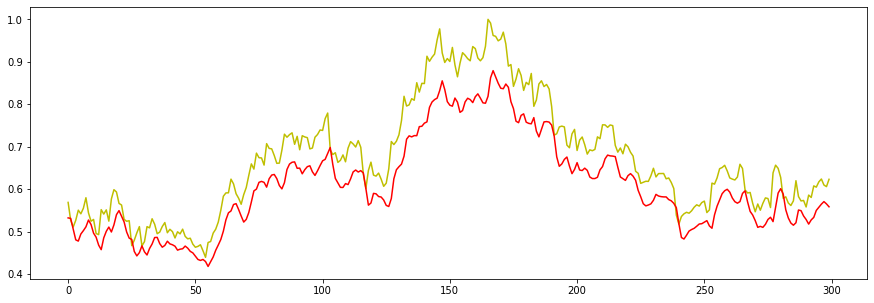

In [59]:
plt.figure(figsize=(15,5))

plt.plot(price[-300:], color='y')
plt.plot(x_test_pred[-300:], color='r')